In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

# Import visualization library
import matplotlib.pyplot as plt


torch.__version__

'2.1.0+cu121'

In [ ]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))


if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


In [ ]:
# Use Pandas to do our dataprocessing on the dataset
import numpy as np
import pandas as pd
import requests
api_url = "https://debt-api-4301881a2ff8.herokuapp.com/loan/get_all"
res = requests.get(api_url)
df = pd.DataFrame(res.json()["data"])
df = df. drop('loan_id', axis=1)
df.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0,12000,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,12800,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,6600,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,12000,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,14100,12.0,1.0,Urban,Y


In [ ]:
df.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0,12000,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,12800,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,6600,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,12000,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,14100,12.0,1.0,Urban,Y


In [ ]:
# Check the size/shape of our dataset
df.dtypes

gender                 object
married                object
dependents             object
education              object
self_employed          object
applicantIncome         int64
coapplicant_income     object
loan_amount             int64
loan_amount_term      float64
credit_history        float64
property_area          object
loan_status            object
dtype: object

In [ ]:
df.isnull().sum()

gender                13
married                3
dependents            15
education              0
self_employed          2
applicantIncome        0
coapplicant_income     0
loan_amount            0
loan_amount_term       0
credit_history        50
property_area          0
loan_status            0
dtype: int64

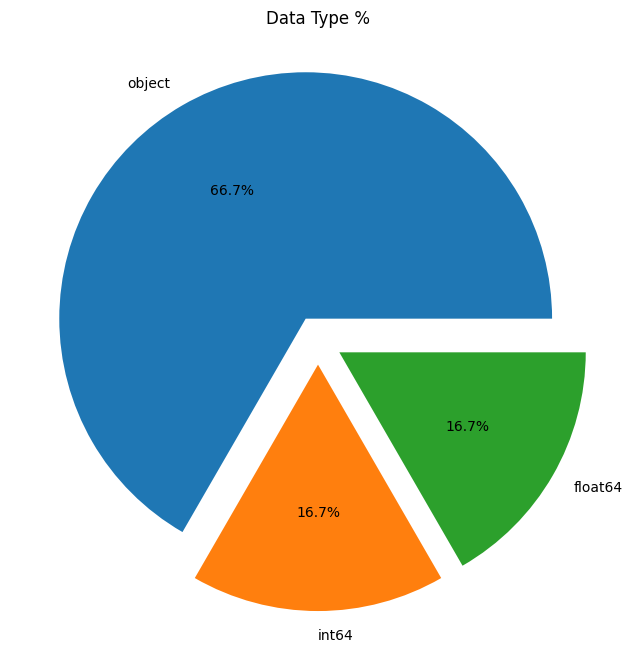

In [ ]:
plt.figure(figsize=(8,8))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',)

plt.title('Data Type %')
plt.show()

In [ ]:
#Missing value
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

df['married'].fillna(df['married'].mode()[0], inplace=True)

df['dependents'].fillna(df['dependents'].mode()[0.0], inplace=True)

df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

df['loan_amount_term'].fillna(df['loan_amount_term'].mode()[0], inplace=True)

df['credit_history'].fillna(df['credit_history'].mode()[0], inplace=True)

df['loan_amount'].fillna(df['loan_amount'].mean(), inplace=True)

df.isnull().sum()

gender                0
married               0
dependents            0
education             0
self_employed         0
applicantIncome       0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [ ]:
df.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0,12000,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,12800,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,6600,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,12000,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,14100,12.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_married = LabelEncoder()
df['married'] = le_married.fit_transform(df['married'])

le_education = LabelEncoder()
df['education'] = le_education.fit_transform(df['education'])

le_self_employed = LabelEncoder()
df['self_employed'] = le_self_employed.fit_transform(df['self_employed'])

le_property_area = LabelEncoder()
df['property_area'] = le_property_area.fit_transform(df['property_area'])

le_loan_status = LabelEncoder()
df['loan_status'] = le_loan_status.fit_transform(df['loan_status'])

In [ ]:
df.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0,12000,12.0,1.0,2,1
1,1,1,1,0,0,4583,1508,12800,12.0,1.0,0,0
2,1,1,0,0,1,3000,0,6600,12.0,1.0,2,1
3,1,1,0,1,0,2583,2358,12000,12.0,1.0,2,1
4,1,0,0,0,0,6000,0,14100,12.0,1.0,2,1


In [ ]:
x = df.drop('loan_status',axis=1)
y = df['loan_status']

In [ ]:
cols = ['gender','married','dependents','education','self_employed','applicantIncome','coapplicant_income','loan_amount','loan_amount_term']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
x[cols]=st.fit_transform(x[cols])

In [ ]:
x

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.072991,-0.554487,-0.282557,0.279683,1.0,2
1,0.472343,0.728816,0.259258,-0.528362,-0.403582,-0.134412,-0.038732,-0.188562,0.279683,1.0,0
2,0.472343,0.728816,-0.735646,-0.528362,2.477808,-0.393747,-0.554487,-0.917017,0.279683,1.0,2
3,0.472343,0.728816,-0.735646,1.892641,-0.403582,-0.462062,0.251980,-0.282557,0.279683,1.0,2
4,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.097728,-0.554487,-0.035822,0.279683,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.735646,-0.528362,-0.403582,-0.410130,-0.554487,-0.858271,0.279683,1.0,0
610,0.472343,0.728816,2.249066,-0.528362,-0.403582,-0.212557,-0.554487,-1.222498,-2.499049,1.0,0
611,0.472343,0.728816,0.259258,-0.528362,-0.403582,0.437174,-0.472404,1.280097,0.279683,1.0,2
612,0.472343,0.728816,1.254162,-0.528362,-0.403582,0.357064,-0.554487,0.504645,0.279683,1.0,2


In [ ]:
x.dependents

0     -0.735646
1      0.259258
2     -0.735646
3     -0.735646
4     -0.735646
         ...   
609   -0.735646
610    2.249066
611    0.259258
612    1.254162
613   -0.735646
Name: dependents, Length: 614, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=8)

In [ ]:
x

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.072991,-0.554487,-0.282557,0.279683,1.0,2
1,0.472343,0.728816,0.259258,-0.528362,-0.403582,-0.134412,-0.038732,-0.188562,0.279683,1.0,0
2,0.472343,0.728816,-0.735646,-0.528362,2.477808,-0.393747,-0.554487,-0.917017,0.279683,1.0,2
3,0.472343,0.728816,-0.735646,1.892641,-0.403582,-0.462062,0.251980,-0.282557,0.279683,1.0,2
4,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.097728,-0.554487,-0.035822,0.279683,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.735646,-0.528362,-0.403582,-0.410130,-0.554487,-0.858271,0.279683,1.0,0
610,0.472343,0.728816,2.249066,-0.528362,-0.403582,-0.212557,-0.554487,-1.222498,-2.499049,1.0,0
611,0.472343,0.728816,0.259258,-0.528362,-0.403582,0.437174,-0.472404,1.280097,0.279683,1.0,2
612,0.472343,0.728816,1.254162,-0.528362,-0.403582,0.357064,-0.554487,0.504645,0.279683,1.0,2


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((552, 11), (62, 11), (552,), (62,))

In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from keras.optimizers import Adam

print(tensorflow.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [ ]:
from keras.layers import InputLayer, Dense
print(f'Shape of df: {x_train.shape}')
print(f'Number of Features in data: {x_train.shape[1]}')

Shape of df: (552, 11)
Number of Features in data: 11


In [ ]:
input_neurons = x_train.shape[1]
print(f'Number of Input Neurons: {input_neurons}')
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 100
neuron_hidden_layer_2 = 50
output_neurons = 1

Number of Input Neurons: 11


In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = (input_neurons,)))
model.add(Dense(units = neuron_hidden_layer_1,activation='relu'))
model.add(Dense(units = neuron_hidden_layer_2,activation='relu'))
model.add(Dense(units = output_neurons,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1200      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6301 (24.61 KB)
Trainable params: 6301 (24.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x_train.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
400,0.472343,0.728816,1.254162,1.892641,-0.403582,-0.411932,-0.554487,-1.163752,-2.499049,0.0,2
263,-2.117107,-1.372089,-0.735646,-0.528362,-0.403582,0.294319,-0.554487,-0.282557,0.279683,1.0,0
392,0.472343,0.728816,-0.735646,-0.528362,-0.403582,-0.462062,0.168870,-0.282557,0.279683,1.0,2
151,0.472343,0.728816,-0.735646,-0.528362,2.477808,-0.463045,0.728062,0.093420,0.279683,1.0,0
290,0.472343,0.728816,-0.735646,-0.528362,-0.403582,-0.381460,0.271816,-0.059320,0.279683,1.0,0


In [ ]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001) , metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
18/18 [==============================] - 1s 14ms/step - loss: 0.6373 - accuracy: 0.6848 - val_loss: 0.5276 - val_accuracy: 0.7581
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.5982 - accuracy: 0.6866 - val_loss: 0.5105 - val_accuracy: 0.7581
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.5679 - accuracy: 0.7011 - val_loss: 0.4869 - val_accuracy: 0.8065
Epoch 4/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.5466 - accuracy: 0.7391 - val_loss: 0.4584 - val_accuracy: 0.8548
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.5270 - accuracy: 0.7645 - val_loss: 0.4266 - val_accuracy: 0.8548
Epoch 6/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.5077 - accuracy: 0.7736 - val_loss: 0.4052 - val_accuracy: 0.9032
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4899 - accuracy: 0.7989 - val_loss: 0.3894 - val_accuracy: 0.9194
Epoch

In [ ]:
prediction = (model.predict(x_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 6ms/step


In [ ]:
accuracy_score(y_test,prediction)

0.9193548387096774

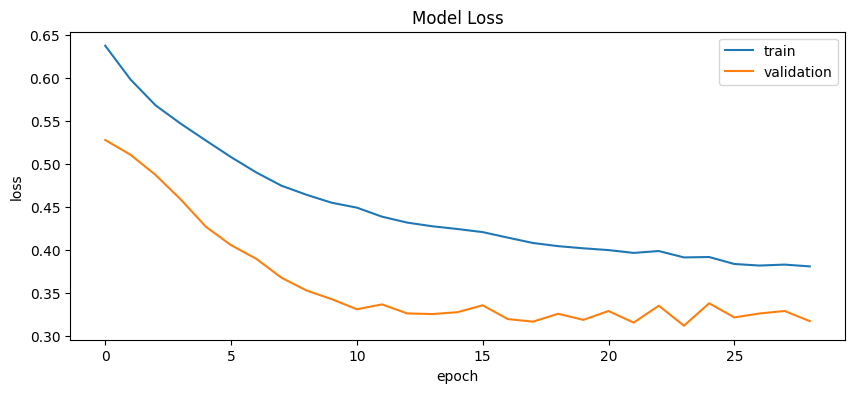

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

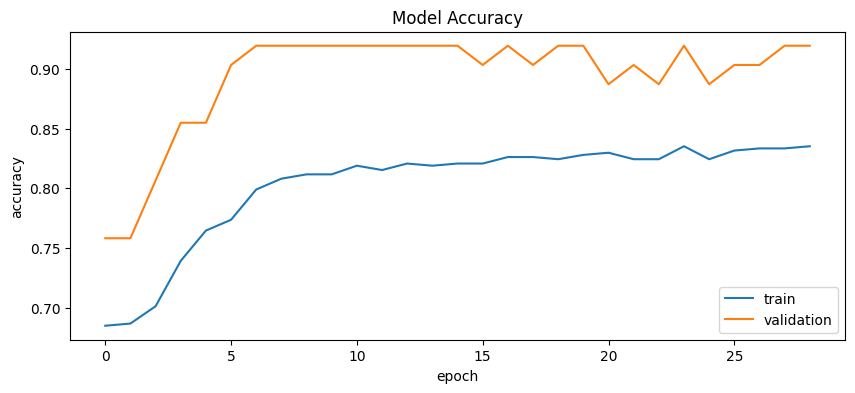

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Model Accuracy',)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='lower right')
plt.show()

In [ ]:
import pickle

In [ ]:
with open ('Neural_Network.pkl' , 'wb') as file :
    pickle.dump(model , file)

In [ ]:
NN_model = pickle.load(open('/content/Neural_Network.pkl' , 'rb'))

In [ ]:
test_input = pd.DataFrame({
  "gender": "Male",
  "married": "Yes",
  "dependents": 0,
  "education": "Graduate",
  "self_employed": "Yes",
  "applicantIncome": 9560,
  "coapplicant_income": 0,
  "loan_amount": 19100,
  "loan_amount_term": 12,
  "credit_history": 1,
  "property_area": "Semiurban",
},index=[0])

test_input['gender']= le_gender.fit_transform(test_input['gender'])
test_input['married']= le_married.fit_transform(test_input['married'])
test_input['education']= le_education.fit_transform(test_input['education'])
test_input['self_employed']= le_self_employed.fit_transform(test_input['self_employed'])
test_input['property_area']= le_property_area.fit_transform(test_input['property_area'])

In [ ]:
test_input.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0,0,0,0,0,9560,0,19100,12,1,0


In [ ]:
prediction = (NN_model.predict(test_input) > 0.5).astype("int32")
prediction = prediction.reshape(-1)
le_loan_status.inverse_transform([prediction])
prediction_label = le_loan_status.inverse_transform(prediction)

prediction_label

1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['N'], dtype=object)